### 1.Case Study Selection 

#                                              Mobiles/Laptops brands and Prices 

## 2. Search for Relevant Websites 

### Scraping The Data From Flipkart Website.

In [31]:
# Import Libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
product_name = []
product_price = []
product_ram = []
product_display = []
product_camera = []
product_processor = []
product_battery = []

In [4]:
# Status code of 24 Pages
for i in range(1,25):
    url = f"https://www.flipkart.com/search?q=samsung+mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    response = requests.get(url)
    html_code = response.text
    soup = BeautifulSoup(html_code)
    print(f"Status code {i}",response.status_code)

    #print()

    #print(soup.text)
    #print(f"\n{'*' * 20} Page {i} {'*' * 20}\n")

    price = soup.find_all("div",class_="Nx9bqj _4b5DiR")
    for i in price:
        #print(i.text)
        product_price.append(re.sub(r"\D","",i.text))

    name = soup.find_all("div",class_="KzDlHZ")
    for i in name:
        product_name.append(i.text)

    features = soup.find_all("li",class_="J+igdf")
    for i in features:
        #print(i.text)
        if 'RAM' in i.text:
            product_ram.append(i.text)
        elif 'Display' in i.text:
            product_display.append(i.text)
        elif 'Camera' in i.text:
            product_camera.append(i.text)
        elif 'Processor' in i.text:
            product_processor.append(i.text)
        elif 'Battery' in i.text:
            product_battery.append(i.text)

Status code 1 200
Status code 2 200
Status code 3 200
Status code 4 200
Status code 5 200
Status code 6 200
Status code 7 200
Status code 8 200
Status code 9 200
Status code 10 200
Status code 11 200
Status code 12 200
Status code 13 200
Status code 14 200
Status code 15 200
Status code 16 200
Status code 17 200
Status code 18 200
Status code 19 200
Status code 20 200
Status code 21 200
Status code 22 200
Status code 23 200
Status code 24 200


In [5]:
request_header = {'Content-Type': 'image/webp; charset=UTF-8', 
                  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:126.0) Gecko/20100101 Firefox/126.0',
                'Accept-Encoding': 'gzip, deflate, br, zstd'                  
                 }

response = requests.get(url, headers=request_header)

In [14]:
# Length of the Fields

print("product_name =",len(product_name))
print("product_price =",len(product_price))
print("product_ram =",len(product_ram))
print("product_display =",len(product_display))
print("product_camera =",len(product_camera))
print("product_processor =",len(product_processor))
print("product_battery =",len(product_battery))

product_name = 885
product_price = 885
product_ram = 885
product_display = 885
product_camera = 885
product_processor = 885
product_battery = 885


In [15]:
# Corrects The length of the Fields 

correct_length = len(product_processor)
product_display = product_display[:correct_length]
product_camera  = product_camera[:correct_length]
product_price  = product_price[:correct_length]
product_battery = product_battery[:correct_length]
product_name  = product_name[:correct_length]
product_ram  = product_ram[:correct_length]
print("product_name =",len(product_name))
print("product_price =",len(product_price))
print("product_ram =",len(product_ram))
print("product_display =",len(product_display))
print("product_camera =",len(product_camera))
print("product_processor =",len(product_processor))
print("product_battery =",len(product_battery))

product_name = 885
product_price = 885
product_ram = 885
product_display = 885
product_camera = 885
product_processor = 885
product_battery = 885


## Create Data Frame

In [16]:
products_df = pd.DataFrame({
    "product_name":product_name,
    "product_price":product_price,
    "product_ram":product_ram,
    "product_display":product_display,
    "product_camera":product_camera,
    "product_battery":product_battery,
    "product_processor":product_processor
})
products_df

product_name product_price  \
0                    Samsung Galaxy F07 (Green, 64 GB)          6999   
1      Samsung Galaxy A35 5G (Awesome Iceblue, 128 GB)         18999   
2          Samsung Galaxy F06 5G (Bahama Blue, 128 GB)          9999   
3        Samsung Galaxy A35 5G (Awesome Lilac, 256 GB)         20999   
4            Samsung Galaxy F06 5G (Lit Violet, 64 GB)          8999   
..                                                 ...           ...   
880  Samsung Galaxy S24 Ultra 5G (Titanium Gray, 51...         22990   
881      Samsung Galaxy A26 5G (Awesome White, 128 GB)         30990   
882              Samsung Galaxy S23 5G (Cream, 128 GB)        111999   
883    Samsung Galaxy Z Fold7 5G (Blue Shadow, 512 GB)         95999   
884  Samsung Galaxy S21 FE 5G with Snapdragon 888 (...         72999   

                                         product_ram  \
0        4 GB RAM | 64 GB ROM | Expandable Upto 2 TB   
1       8 GB RAM | 128 GB ROM | Expandable Upto 1 TB   
2    4 GB RAM | 128 GB ROM | Expandable Upto 1500 GB   
3       8 GB RAM | 256 GB ROM | Expandable Upto 1 TB   
4     4 GB RAM | 64 GB ROM | Expandable Upto 1500 GB   
..                                               ...   
880                           12 GB RAM | 512 GB ROM   
881     8 GB RAM | 128 GB ROM | Expandable Upto 1 TB   
882                            8 GB RAM | 128 GB ROM   
883                           12 GB RAM | 512 GB ROM   
884                            8 GB RAM | 128 GB ROM   

                          product_display  \
0         17.02 cm (6.7 inch) HD+ Display   
1    16.76 cm (6.6 inch) Full HD+ Display   
2         17.02 cm (6.7 inch) HD+ Display   
3    16.76 cm (6.6 inch) Full HD+ Display   
4         17.02 cm (6.7 inch) HD+ Display   
..                                    ...   
880                  Super AMOLED Display   
881  16.26 cm (6.4 inch) Full HD+ Display   
882                  Super AMOLED Display   
883       17.02 cm (6.7 inch) HD+ Display   
884       17.02 cm (6.7 inch) HD+ Display   

                                     product_camera   product_battery  \
0                     50MP + 2MP | 8MP Front Camera  5000 mAh Battery   
1              50MP + 8MP + 5MP | 13MP Front Camera  5000 mAh Battery   
2                     50MP + 2MP | 8MP Front Camera  5000 mAh Battery   
3              50MP + 8MP + 5MP | 13MP Front Camera  5000 mAh Battery   
4                     50MP + 2MP | 8MP Front Camera  5000 mAh Battery   
..                                              ...               ...   
880     64MP + 12MP + 5MP + 5MP | 32MP Front Camera  3700 mAh Battery   
881  200MP + 10MP + 12MP + 10MP | 12MP Front Camera  4400 mAh Battery   
882           50MP + 12MP + 5MP | 32MP Front Camera  5000 mAh Battery   
883                   50MP + 2MP | 8MP Front Camera  4300 mAh Battery   
884            50MP + 5MP + 2MP | 13MP Front Camera  5000 mAh Battery   

                         product_processor  
0                      Helio G99 Processor  
1            Samsung Exynos 1380 Processor  
2                 Dimensity 6300 Processor  
3                    Exynos 1380 Processor  
4                 Dimensity 6300 Processor  
..                                     ...  
880   Exynos Octa Core Processor Processor  
881                  Exynos 9611 Processor  
882  Mediatek Helio P35 (MT6765) Processor  
883                     MEDIATEK Processor  
884             Exynos Octa Core Processor  

[885 rows x 7 columns]

In [17]:

# Extract color
products_df['product_color'] = products_df['product_name'].str.extract(r"\(([^,]+),")

# Extract ROM (digits + GB/TB before closing parenthesis)
products_df['product_rom'] = products_df['product_name'].str.extract(r",\s*([\d\.]+\s*(?:GB|TB))\)")

products_df['product_name'] = products_df['product_name'].apply(lambda x: re.sub(r"\s\(.+\)","",x))

In [18]:
products_df

product_name product_price  \
0                              Samsung Galaxy F07          6999   
1                           Samsung Galaxy A35 5G         18999   
2                           Samsung Galaxy F06 5G          9999   
3                           Samsung Galaxy A35 5G         20999   
4                           Samsung Galaxy F06 5G          8999   
..                                            ...           ...   
880                   Samsung Galaxy S24 Ultra 5G         22990   
881                         Samsung Galaxy A26 5G         30990   
882                         Samsung Galaxy S23 5G        111999   
883                     Samsung Galaxy Z Fold7 5G         95999   
884  Samsung Galaxy S21 FE 5G with Snapdragon 888         72999   

                                         product_ram  \
0        4 GB RAM | 64 GB ROM | Expandable Upto 2 TB   
1       8 GB RAM | 128 GB ROM | Expandable Upto 1 TB   
2    4 GB RAM | 128 GB ROM | Expandable Upto 1500 GB   
3       8 GB RAM | 256 GB ROM | Expandable Upto 1 TB   
4     4 GB RAM | 64 GB ROM | Expandable Upto 1500 GB   
..                                               ...   
880                           12 GB RAM | 512 GB ROM   
881     8 GB RAM | 128 GB ROM | Expandable Upto 1 TB   
882                            8 GB RAM | 128 GB ROM   
883                           12 GB RAM | 512 GB ROM   
884                            8 GB RAM | 128 GB ROM   

                          product_display  \
0         17.02 cm (6.7 inch) HD+ Display   
1    16.76 cm (6.6 inch) Full HD+ Display   
2         17.02 cm (6.7 inch) HD+ Display   
3    16.76 cm (6.6 inch) Full HD+ Display   
4         17.02 cm (6.7 inch) HD+ Display   
..                                    ...   
880                  Super AMOLED Display   
881  16.26 cm (6.4 inch) Full HD+ Display   
882                  Super AMOLED Display   
883       17.02 cm (6.7 inch) HD+ Display   
884       17.02 cm (6.7 inch) HD+ Display   

                                     product_camera   product_battery  \
0                     50MP + 2MP | 8MP Front Camera  5000 mAh Battery   
1              50MP + 8MP + 5MP | 13MP Front Camera  5000 mAh Battery   
2                     50MP + 2MP | 8MP Front Camera  5000 mAh Battery   
3              50MP + 8MP + 5MP | 13MP Front Camera  5000 mAh Battery   
4                     50MP + 2MP | 8MP Front Camera  5000 mAh Battery   
..                                              ...               ...   
880     64MP + 12MP + 5MP + 5MP | 32MP Front Camera  3700 mAh Battery   
881  200MP + 10MP + 12MP + 10MP | 12MP Front Camera  4400 mAh Battery   
882           50MP + 12MP + 5MP | 32MP Front Camera  5000 mAh Battery   
883                   50MP + 2MP | 8MP Front Camera  4300 mAh Battery   
884            50MP + 5MP + 2MP | 13MP Front Camera  5000 mAh Battery   

                         product_processor    product_color product_rom  
0                      Helio G99 Processor            Green       64 GB  
1            Samsung Exynos 1380 Processor  Awesome Iceblue      128 GB  
2                 Dimensity 6300 Processor      Bahama Blue      128 GB  
3                    Exynos 1380 Processor    Awesome Lilac      256 GB  
4                 Dimensity 6300 Processor       Lit Violet       64 GB  
..                                     ...              ...         ...  
880   Exynos Octa Core Processor Processor    Titanium Gray      512 GB  
881                  Exynos 9611 Processor    Awesome White      128 GB  
882  Mediatek Helio P35 (MT6765) Processor            Cream      128 GB  
883                     MEDIATEK Processor      Blue Shadow      512 GB  
884             Exynos Octa Core Processor             Navy      128 GB  

[885 rows x 9 columns]

## Export into .csv format 

In [19]:
products_df.to_csv("samsung_mobiles.csv", index=False)

## Read CSV File

In [20]:
 import pandas as pd

df = pd.read_csv("samsung_mobiles.csv")
df

product_name  product_price  \
0                              Samsung Galaxy F07           6999   
1                           Samsung Galaxy A35 5G          18999   
2                           Samsung Galaxy F06 5G           9999   
3                           Samsung Galaxy A35 5G          20999   
4                           Samsung Galaxy F06 5G           8999   
..                                            ...            ...   
880                   Samsung Galaxy S24 Ultra 5G          22990   
881                         Samsung Galaxy A26 5G          30990   
882                         Samsung Galaxy S23 5G         111999   
883                     Samsung Galaxy Z Fold7 5G          95999   
884  Samsung Galaxy S21 FE 5G with Snapdragon 888          72999   

                                         product_ram  \
0        4 GB RAM | 64 GB ROM | Expandable Upto 2 TB   
1       8 GB RAM | 128 GB ROM | Expandable Upto 1 TB   
2    4 GB RAM | 128 GB ROM | Expandable Upto 1500 GB   
3       8 GB RAM | 256 GB ROM | Expandable Upto 1 TB   
4     4 GB RAM | 64 GB ROM | Expandable Upto 1500 GB   
..                                               ...   
880                           12 GB RAM | 512 GB ROM   
881     8 GB RAM | 128 GB ROM | Expandable Upto 1 TB   
882                            8 GB RAM | 128 GB ROM   
883                           12 GB RAM | 512 GB ROM   
884                            8 GB RAM | 128 GB ROM   

                          product_display  \
0         17.02 cm (6.7 inch) HD+ Display   
1    16.76 cm (6.6 inch) Full HD+ Display   
2         17.02 cm (6.7 inch) HD+ Display   
3    16.76 cm (6.6 inch) Full HD+ Display   
4         17.02 cm (6.7 inch) HD+ Display   
..                                    ...   
880                  Super AMOLED Display   
881  16.26 cm (6.4 inch) Full HD+ Display   
882                  Super AMOLED Display   
883       17.02 cm (6.7 inch) HD+ Display   
884       17.02 cm (6.7 inch) HD+ Display   

                                     product_camera   product_battery  \
0                     50MP + 2MP | 8MP Front Camera  5000 mAh Battery   
1              50MP + 8MP + 5MP | 13MP Front Camera  5000 mAh Battery   
2                     50MP + 2MP | 8MP Front Camera  5000 mAh Battery   
3              50MP + 8MP + 5MP | 13MP Front Camera  5000 mAh Battery   
4                     50MP + 2MP | 8MP Front Camera  5000 mAh Battery   
..                                              ...               ...   
880     64MP + 12MP + 5MP + 5MP | 32MP Front Camera  3700 mAh Battery   
881  200MP + 10MP + 12MP + 10MP | 12MP Front Camera  4400 mAh Battery   
882           50MP + 12MP + 5MP | 32MP Front Camera  5000 mAh Battery   
883                   50MP + 2MP | 8MP Front Camera  4300 mAh Battery   
884            50MP + 5MP + 2MP | 13MP Front Camera  5000 mAh Battery   

                         product_processor    product_color product_rom  
0                      Helio G99 Processor            Green       64 GB  
1            Samsung Exynos 1380 Processor  Awesome Iceblue      128 GB  
2                 Dimensity 6300 Processor      Bahama Blue      128 GB  
3                    Exynos 1380 Processor    Awesome Lilac      256 GB  
4                 Dimensity 6300 Processor       Lit Violet       64 GB  
..                                     ...              ...         ...  
880   Exynos Octa Core Processor Processor    Titanium Gray      512 GB  
881                  Exynos 9611 Processor    Awesome White      128 GB  
882  Mediatek Helio P35 (MT6765) Processor            Cream      128 GB  
883                     MEDIATEK Processor      Blue Shadow      512 GB  
884             Exynos Octa Core Processor             Navy      128 GB  

[885 rows x 9 columns]

In [21]:
# How many features(Columns) do you have?
df.shape[1]

9

In [22]:
# How many observations(rows) do you have?
df.shape[0]

885

In [23]:
# What is the data type of each feature(Columns)?
df.dtypes

product_name         object
product_price         int64
product_ram          object
product_display      object
product_camera       object
product_battery      object
product_processor    object
product_color        object
product_rom          object
dtype: object

In [24]:
# How many missing values are there?
df.isnull().sum()

product_name         0
product_price        0
product_ram          0
product_display      0
product_camera       0
product_battery      0
product_processor    0
product_color        5
product_rom          7
dtype: int64

## Clean the Data 

In [25]:

# Removing the special characters
df = df.replace(r'[^\w\s\.]', '', regex=True)

# Incorrect Headers
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Incorrect Format of the data (Invalid Values, Columns)
numeric_cols = ['product_price', 'product_ram', 'product_rom', 'product_camera', 'product_battery']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.extract('(\d+)')
        
# Converting the data types
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Identifying and Treatment of the missing values
df = df.dropna()

# Identifying and treating the Outliers (Based on the Problem Statement or Data)
q1 = df['product_price'].quantile(0.25)
q3 = df['product_price'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df['product_price'] >= lower) & (df['product_price'] <= upper)]


In [26]:
df

product_name  product_price  product_ram  \
0             Samsung Galaxy F07           6999            4   
1          Samsung Galaxy A35 5G          18999            8   
2          Samsung Galaxy F06 5G           9999            4   
3          Samsung Galaxy A35 5G          20999            8   
4          Samsung Galaxy F06 5G           8999            4   
..                           ...            ...          ...   
876  Samsung Galaxy S24 Ultra 5G          23999           12   
877    Samsung Galaxy Z Flip7 5G          44999           12   
879    Samsung Galaxy Z Flip7 5G          45999           12   
880  Samsung Galaxy S24 Ultra 5G          22990           12   
881        Samsung Galaxy A26 5G          30990            8   

                       product_display  product_camera  product_battery  \
0         17.02 cm 6.7 inch HD Display              50             5000   
1    16.76 cm 6.6 inch Full HD Display              50             5000   
2         17.02 cm 6.7 inch HD Display              50             5000   
3    16.76 cm 6.6 inch Full HD Display              50             5000   
4         17.02 cm 6.7 inch HD Display              50             5000   
..                                 ...             ...              ...   
876               Super AMOLED Display              50             4400   
877  16.26 cm 6.4 inch Full HD Display              50             6000   
879  16.26 cm 6.4 inch Full HD Display              48             3700   
880               Super AMOLED Display              64             3700   
881  16.26 cm 6.4 inch Full HD Display             200             4400   

                        product_processor    product_color  product_rom  
0                     Helio G99 Processor            Green         64.0  
1           Samsung Exynos 1380 Processor  Awesome Iceblue        128.0  
2                Dimensity 6300 Processor      Bahama Blue        128.0  
3                   Exynos 1380 Processor    Awesome Lilac        256.0  
4                Dimensity 6300 Processor       Lit Violet         64.0  
..                                    ...              ...          ...  
876                   Helio G85 Processor  Titanium Violet        512.0  
877              Unisoc UMS9230 Processor         Coralred        512.0  
879                 Exynos 9611 Processor         Jetblack        512.0  
880  Exynos Octa Core Processor Processor    Titanium Gray        512.0  
881                 Exynos 9611 Processor    Awesome White        128.0  

[759 rows x 9 columns]

In [29]:
# Save final cleaned data
df.to_csv("samsung_mobiles_final_cleaned.csv", index=False)
print("\n Final cleaned data saved as 'samsung_mobiles_final_cleaned.csv'")


 Final cleaned data saved as 'samsung_mobiles_final_cleaned.csv'


In [30]:
print(df.shape)
print(df.info())
print(df.isnull().sum())


(759, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 881
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       759 non-null    object 
 1   product_price      759 non-null    int64  
 2   product_ram        759 non-null    int64  
 3   product_display    759 non-null    object 
 4   product_camera     759 non-null    int64  
 5   product_battery    759 non-null    int64  
 6   product_processor  759 non-null    object 
 7   product_color      759 non-null    object 
 8   product_rom        759 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 59.3+ KB
None
product_name         0
product_price        0
product_ram          0
product_display      0
product_camera       0
product_battery      0
product_processor    0
product_color        0
product_rom          0
dtype: int64


## Data Visulization

In [32]:
# Load cleaned data
df = pd.read_csv("samsung_mobiles_final_cleaned.csv")

# Check first few rows
df.head()

product_name  product_price  product_ram  \
0     Samsung Galaxy F07           6999            4   
1  Samsung Galaxy A35 5G          18999            8   
2  Samsung Galaxy F06 5G           9999            4   
3  Samsung Galaxy A35 5G          20999            8   
4  Samsung Galaxy F06 5G           8999            4   

                     product_display  product_camera  product_battery  \
0       17.02 cm 6.7 inch HD Display              50             5000   
1  16.76 cm 6.6 inch Full HD Display              50             5000   
2       17.02 cm 6.7 inch HD Display              50             5000   
3  16.76 cm 6.6 inch Full HD Display              50             5000   
4       17.02 cm 6.7 inch HD Display              50             5000   

               product_processor    product_color  product_rom  
0            Helio G99 Processor            Green         64.0  
1  Samsung Exynos 1380 Processor  Awesome Iceblue        128.0  
2       Dimensity 6300 Processor      Bahama Blue        128.0  
3          Exynos 1380 Processor    Awesome Lilac        256.0  
4       Dimensity 6300 Processor       Lit Violet         64.0

In [33]:
# Separate Columns by Type
categorical_cols = ['product_name','product_color']
numerical_cols = ['product_price', 'product_ram', 'product_rom', 'product_battery', 'product_camera']


In [34]:
# Univariate Analysis
# For Numerical Columns
# Central tendency & dispersion:
df[numerical_cols].describe()

product_price  product_ram  product_rom  product_battery  \
count     759.000000   759.000000   759.000000       759.000000   
mean    19177.537549     6.558630   153.826087      4937.689065   
std      9991.742001     2.495151   103.021164       801.551162   
min      5900.000000     1.000000     1.000000         1.000000   
25%     12499.000000     4.000000   128.000000      5000.000000   
50%     16499.000000     6.000000   128.000000      5000.000000   
75%     22999.000000     8.000000   128.000000      5000.000000   
max     52999.000000    16.000000   512.000000      7000.000000   

       product_camera  
count      759.000000  
mean        54.194993  
std         32.173695  
min          0.000000  
25%         50.000000  
50%         50.000000  
75%         50.000000  
max        200.000000

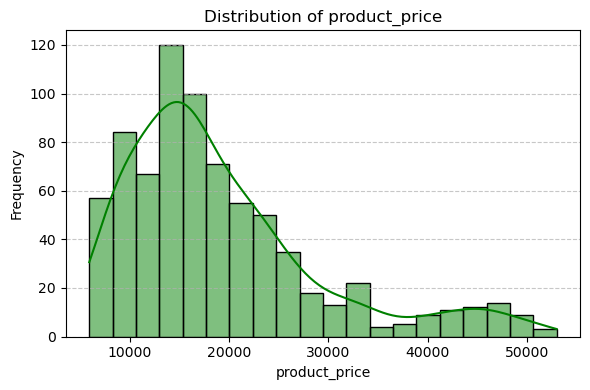

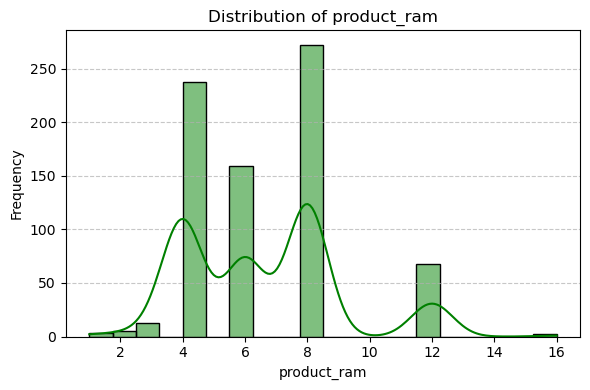

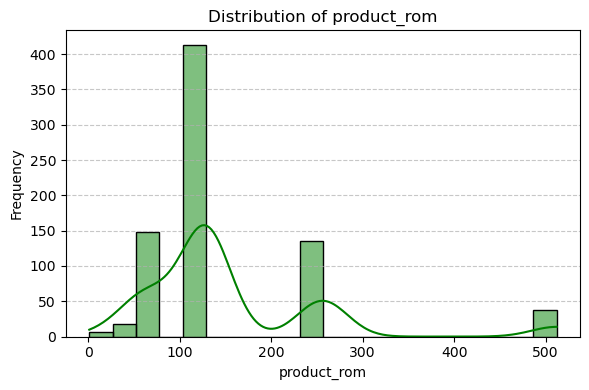

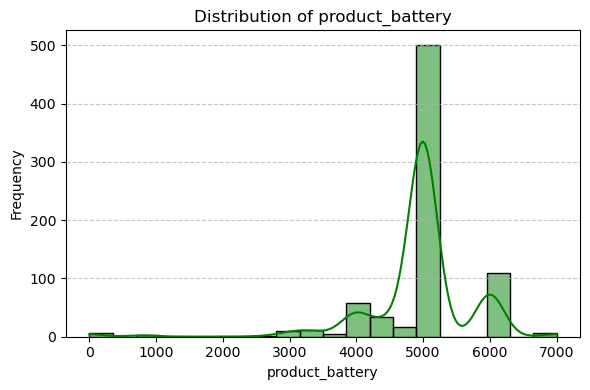

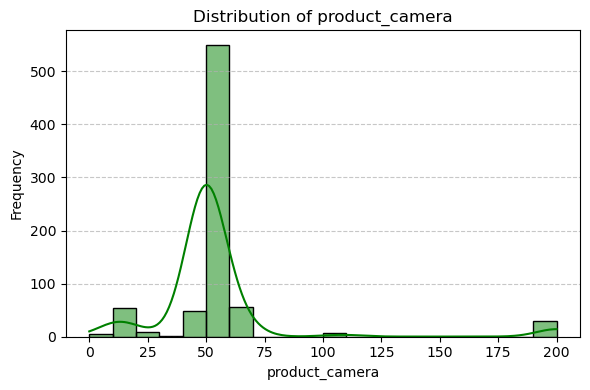

In [38]:
# Histogram / Distribution plots:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True, color='green')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

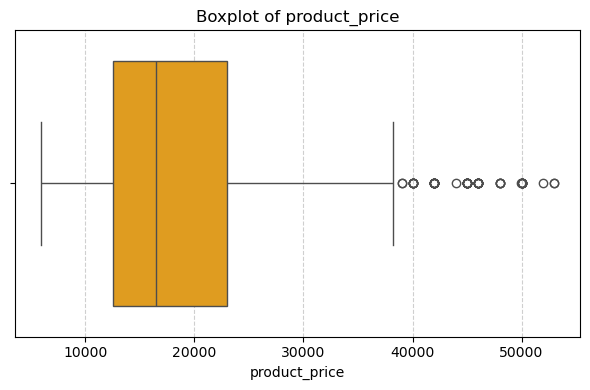

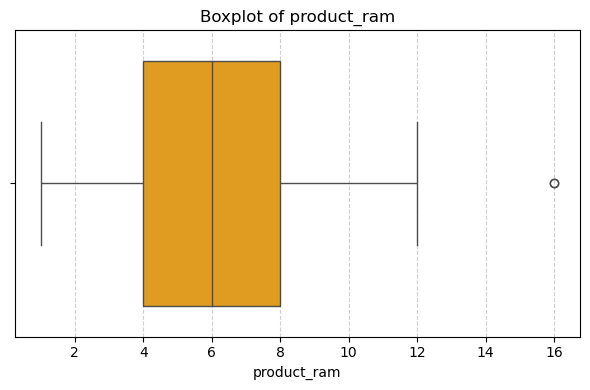

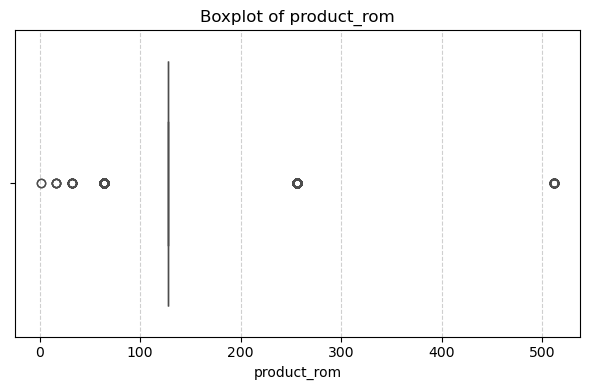

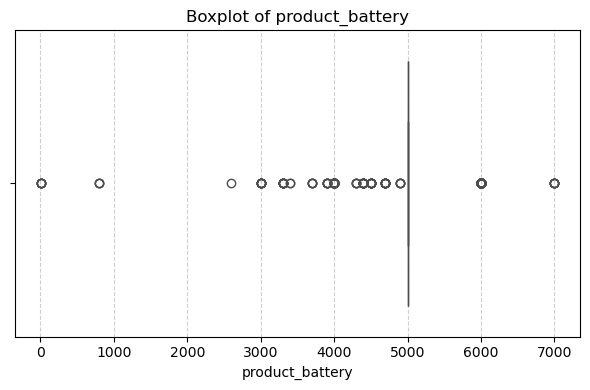

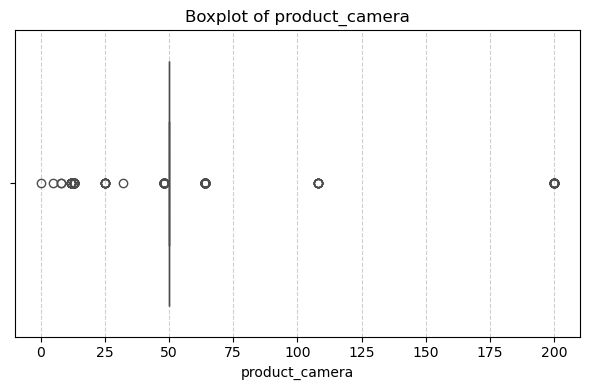

In [39]:
# 2️⃣ Box Plot (to check spread and outliers)
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

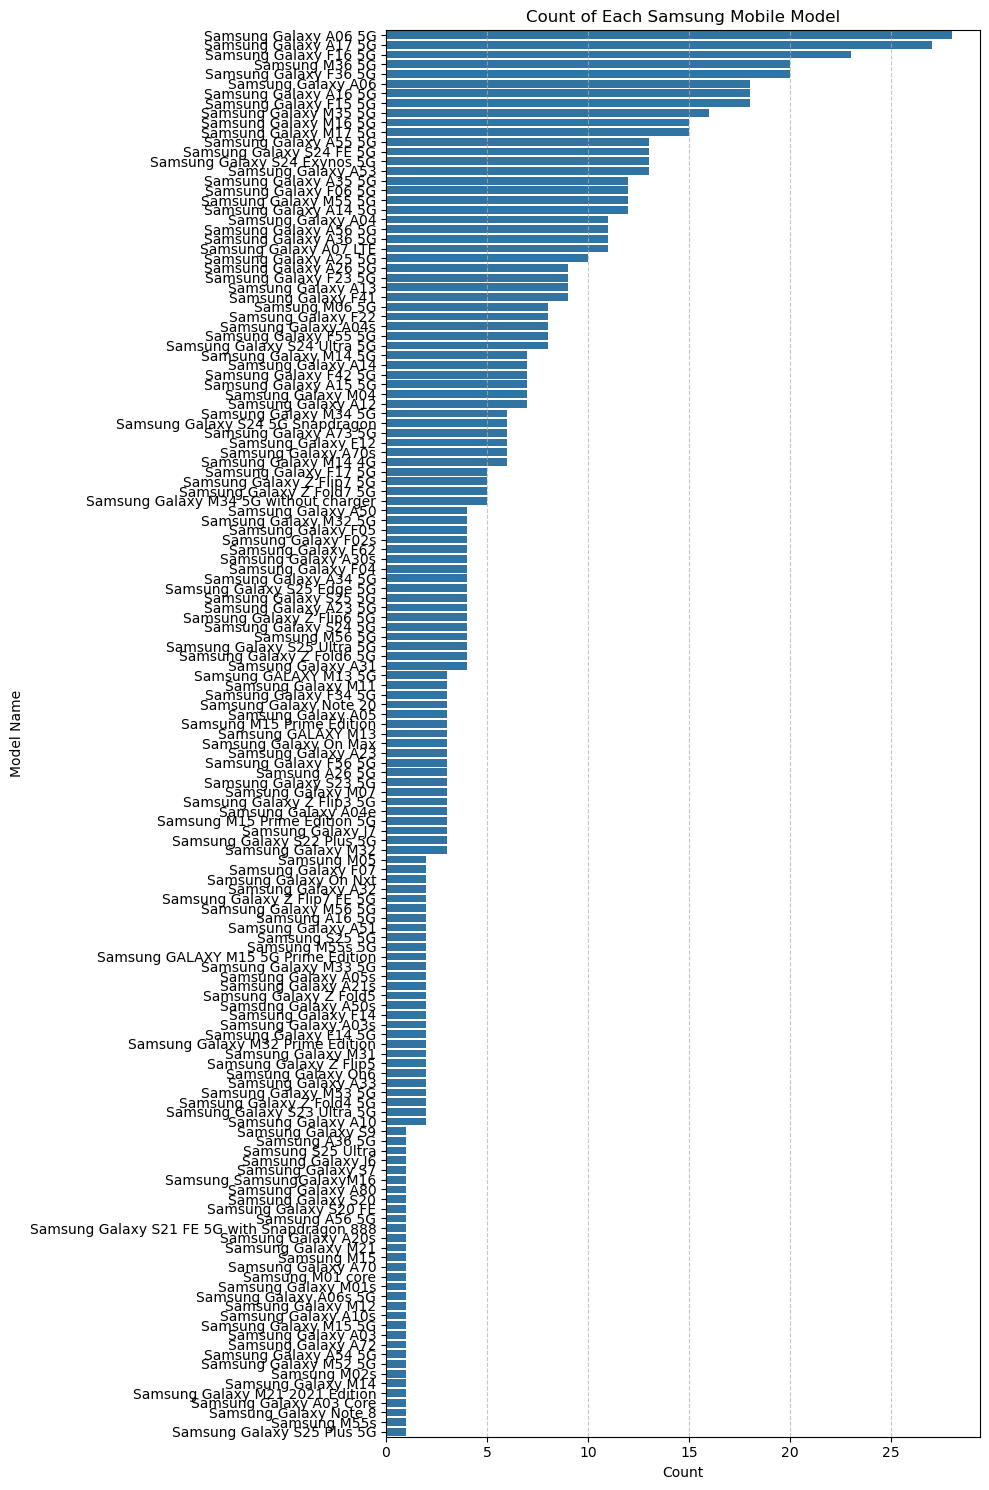

In [46]:
# 3️⃣ Count Plot (for categorical variable)
plt.figure(figsize=(10,15))  
sns.countplot(y='product_name', data=df, order=df['product_name'].value_counts().index)
plt.title("Count of Each Samsung Mobile Model")
plt.xlabel("Count")
plt.ylabel("Model Name")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



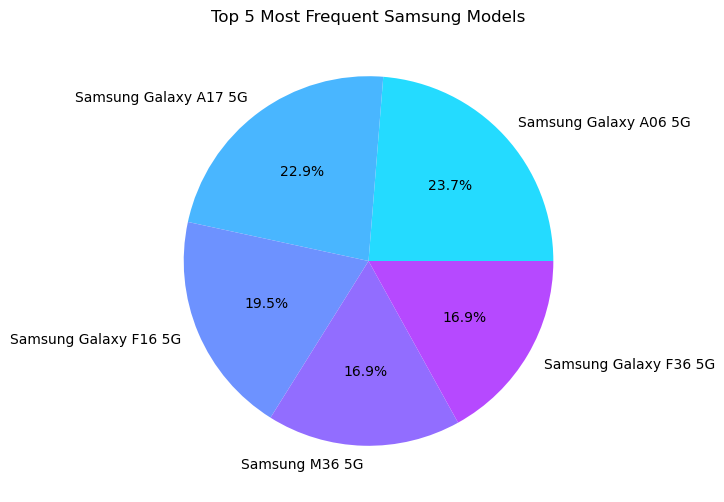

In [47]:
# 4️⃣ Pie Chart (Top 5 models)
top_models = df['product_name'].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(top_models.values, labels=top_models.index, autopct='%1.1f%%', colors=sns.color_palette('cool'))
plt.title("Top 5 Most Frequent Samsung Models")
plt.show()


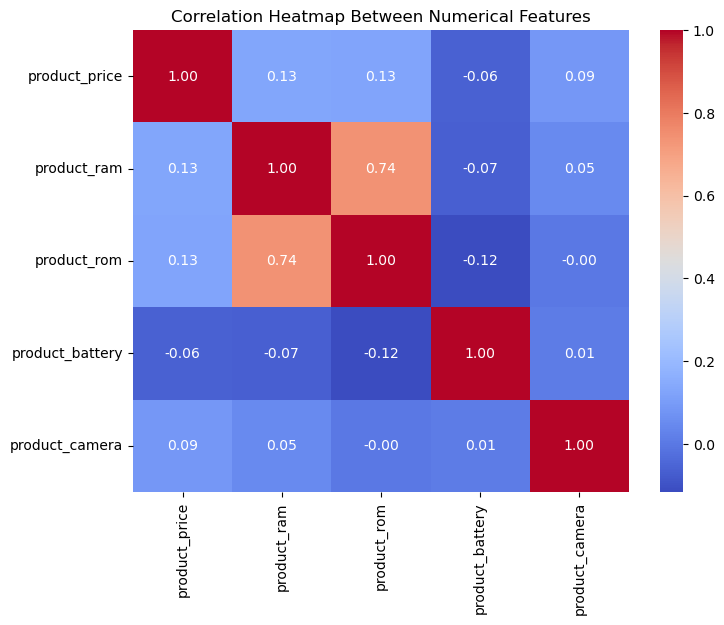

In [48]:
# BI-VARIATE / MULTI-VARIATE ANALYSIS
# # 1️⃣ Continuous vs Continuous (Correlation)
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap Between Numerical Features")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20384\1627063333.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='product_ram', y='product_price', data=df, palette='viridis', ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20384\1627063333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_ram', y='product_price', data=df, palette='viridis', ci=None)


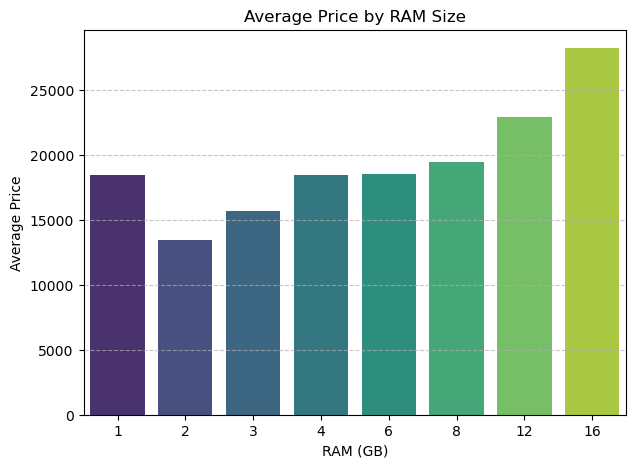

In [50]:
# 2️⃣ Continuous vs Categorical (Price vs RAM)
plt.figure(figsize=(7,5))
sns.barplot(x='product_ram', y='product_price', data=df, palette='viridis', ci=None)
plt.title("Average Price by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Average Price")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

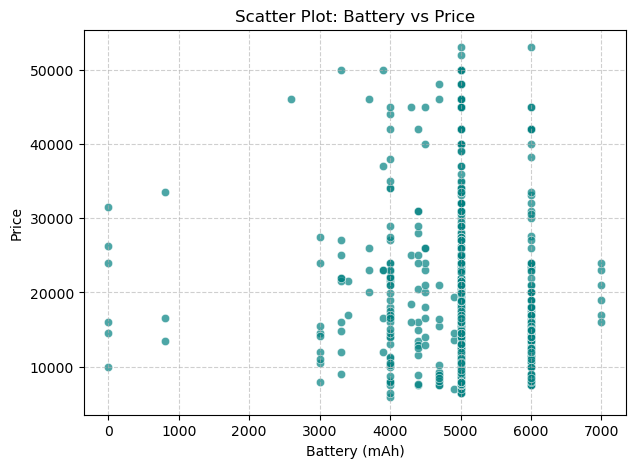

In [52]:
# 4️⃣ Scatter Plot (Price vs Battery)
plt.figure(figsize=(7,5))
sns.scatterplot(x='product_battery', y='product_price', data=df, color='teal', alpha=0.7)
plt.title("Scatter Plot: Battery vs Price")
plt.xlabel("Battery (mAh)")
plt.ylabel("Price")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20384\1920555814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='product_ram', y='product_price', data=df, palette='pastel')


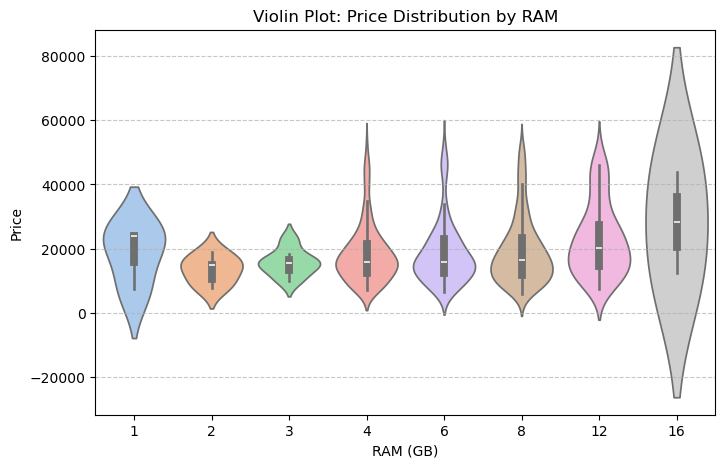

In [54]:
# 5️⃣ Violin Plot (Price by RAM)
plt.figure(figsize=(8,5))
sns.violinplot(x='product_ram', y='product_price', data=df, palette='pastel')
plt.title("Violin Plot: Price Distribution by RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()